# Azure Cognitive Services Face API Landmark attributes

We can use Azure Cognitive Services Face API to detect landmark attributes for each face.<br>
**Face landmarks are a set of easy-to-find points on a face**, such as the pupils or the tip of the nose. By default, **there are 27 predefined landmark points**. <br><br>The following figure shows all 27 points:

<img src="https://docs.microsoft.com/en-us/azure/cognitive-services/face/images/landmarks.1.jpg">

> Documentation: https://docs.microsoft.com/en-us/azure/cognitive-services/face/concepts/face-detection

## 1. Settings

In [1]:
# Need to install azure-cognitiveservices-vision-face
#!pip install azure-cognitiveservices-vision-face

> https://azure.github.io/azure-sdk/releases/latest/all/python.html

In [2]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.spatial import distance
import cv2
import urllib
from io import BytesIO
from skimage import io

In [3]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [4]:
import datetime
now = datetime.datetime.now()
print("Today=", now)

Today= 2021-06-10 09:52:45.785860


In [5]:
print("Azure Cognitiveservices Vision Face version:")
!pip list | grep "azure-cognitiveservices-vision-face"

Azure Cognitiveservices Vision Face version:
azure-cognitiveservices-vision-face           0.5.0


In [6]:
face_key = 'yourkey'
face_endpoint = 'https://westeurope.api.cognitive.microsoft.com/'
print('You are using Azure Face Detection endpoint:', face_endpoint)

You are using Azure Face Detection endpoint: https://westeurope.api.cognitive.microsoft.com/


## 2. Let's test

In [7]:
face_client = FaceClient(face_endpoint, CognitiveServicesCredentials(face_key))

In [8]:
image_url = 'https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/faces.jpg?raw=true'
image_file = 'image1.jpg'
urllib.request.urlretrieve(image_url, filename=image_file)
print("Image is downloaded and ready to be analysed.")

Image is downloaded and ready to be analysed.


In [9]:
image_path = os.path.join('image1.jpg')
image_data = open(image_path, 'rb')

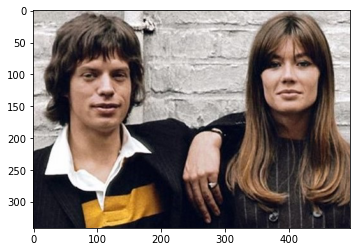

In [10]:
myimage = io.imread(image_file)
plt.imshow(myimage)
plt.show()

## Let's view the results

In [11]:
face_api_url = "https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect"
headers = {'Content-Type': 'application/octet-stream', 'Ocp-Apim-Subscription-Key': face_key}
params = { 'returnFaceId': 'true', 'returnFaceLandmarks': 'true' }

response = requests.post(face_api_url, params=params, headers=headers, data=image_data)
response.raise_for_status()
faces=response.json()

In [14]:
print(len(response.json()), "persons have been identified in the image.")

2 persons have been identified in the image.


In [15]:
print("Results:\n")
response.json()

Results:



[{'faceId': '83d64a87-ff99-4f68-9184-870b3ecfb9a8',
  'faceRectangle': {'top': 72, 'left': 59, 'width': 106, 'height': 106},
  'faceLandmarks': {'pupilLeft': {'x': 86.3, 'y': 102.3},
   'pupilRight': {'x': 132.9, 'y': 102.1},
   'noseTip': {'x': 116.3, 'y': 125.2},
   'mouthLeft': {'x': 89.0, 'y': 149.8},
   'mouthRight': {'x': 135.5, 'y': 149.9},
   'eyebrowLeftOuter': {'x': 74.0, 'y': 92.6},
   'eyebrowLeftInner': {'x': 103.2, 'y': 93.2},
   'eyeLeftOuter': {'x': 81.3, 'y': 102.6},
   'eyeLeftTop': {'x': 87.4, 'y': 100.3},
   'eyeLeftBottom': {'x': 87.5, 'y': 105.1},
   'eyeLeftInner': {'x': 94.3, 'y': 102.8},
   'eyebrowRightInner': {'x': 125.6, 'y': 93.4},
   'eyebrowRightOuter': {'x': 149.3, 'y': 93.2},
   'eyeRightInner': {'x': 126.7, 'y': 102.7},
   'eyeRightTop': {'x': 133.6, 'y': 100.5},
   'eyeRightBottom': {'x': 133.0, 'y': 104.6},
   'eyeRightOuter': {'x': 139.9, 'y': 103.3},
   'noseRootLeft': {'x': 106.7, 'y': 102.7},
   'noseRootRight': {'x': 118.6, 'y': 102.6},
   'nose

Face Landmarks Attributes detection with Azure Cognitive Services:


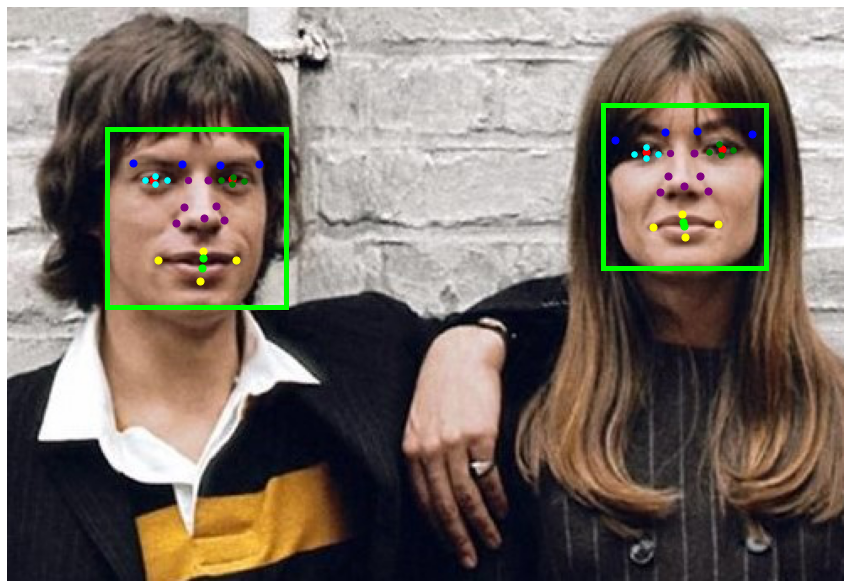

In [16]:
print("Face Landmarks Attributes detection with Azure Cognitive Services:")

image_orig = open(image_path, 'rb').read()
image = Image.open(BytesIO(image_orig))
    
plt.figure(figsize=(15, 15))
ax = plt.imshow(image, alpha=1)

for face in faces:
    fr = face['faceRectangle']
    flm = face['faceLandmarks']
    pupilLeft = flm['pupilLeft']
    pupilRight = flm['pupilRight']
    noseTip = flm['noseTip']
    mouthLeft = flm['mouthLeft']
    mouthRight = flm['mouthRight']
    eyebrowLeftOuter = flm['eyebrowLeftOuter']
    eyebrowLeftInner = flm['eyebrowLeftInner']
    eyeLeftInner = flm['eyeLeftInner']
    eyeLeftTop = flm['eyeLeftTop']
    eyeLeftBottom = flm['eyeLeftBottom']
    eyeLeftOuter = flm['eyeLeftOuter']
    eyebrowRightInner = flm['eyebrowRightInner']
    eyebrowRightOuter = flm['eyebrowRightOuter']
    eyeRightInner = flm['eyeRightInner']
    eyeRightTop = flm['eyeRightTop']
    eyeRightBottom = flm['eyeRightBottom']
    eyeRightOuter = flm['eyeRightOuter']
    noseRootLeft = flm['noseRootLeft']
    noseRootRight = flm['noseRootRight']
    noseLeftAlarTop = flm['noseLeftAlarTop']
    noseRightAlarTop = flm['noseRightAlarTop']
    noseLeftAlarOutTip = flm['noseLeftAlarOutTip']
    noseRightAlarOutTip = flm['noseRightAlarOutTip']
    upperLipTop = flm['upperLipTop']
    upperLipBottom = flm['upperLipBottom']
    underLipTop = flm['underLipTop']
    underLipBottom = flm['underLipBottom']
    
    origin = (fr['left'], fr['top'])
    p = patches.Rectangle(origin, fr['width'], fr['height'], fill=False, linewidth=5, color='lime')
    ax.axes.add_patch(p)
    _ = plt.axis('off')
    
    plt.scatter(pupilLeft['x'],pupilLeft['y'],c='red', s=50)
    plt.scatter(pupilRight['x'],pupilRight['y'],c='red', s=50)
    plt.scatter(noseTip['x'],noseTip['y'],c='purple', s=50)
    plt.scatter(mouthLeft['x'],mouthLeft['y'],c='yellow', s=50)
    plt.scatter(mouthRight['x'],mouthRight['y'],c='yellow', s=50)
    plt.scatter(eyebrowLeftInner['x'],eyebrowLeftInner['y'],c='blue', s=50)
    plt.scatter(eyebrowLeftOuter['x'],eyebrowLeftOuter['y'],c='blue', s=50)
    plt.scatter(eyeLeftInner['x'],eyeLeftInner['y'],c='cyan', s=30)
    plt.scatter(eyeLeftTop['x'],eyeLeftTop['y'],c='cyan', s=30)
    plt.scatter(eyeLeftBottom['x'],eyeLeftBottom['y'],c='cyan', s=30)
    plt.scatter(eyeLeftOuter['x'],eyeLeftOuter['y'],c='cyan', s=30)
    plt.scatter(eyebrowRightInner['x'],eyebrowRightInner['y'],c='blue', s=50)
    plt.scatter(eyebrowRightOuter['x'],eyebrowRightOuter['y'],c='blue', s=50)
    plt.scatter(eyeRightInner['x'],eyeRightInner['y'],c='green', s=30)
    plt.scatter(eyeRightTop['x'],eyeRightTop['y'],c='green', s=30)
    plt.scatter(eyeRightBottom['x'],eyeRightBottom['y'],c='green', s=30)
    plt.scatter(eyeRightOuter['x'],eyeRightOuter['y'],c='green', s=30)
    plt.scatter(noseRootLeft['x'],noseRootLeft['y'],c='purple', s=40)
    plt.scatter(noseRootRight['x'],noseRootRight['y'],c='purple', s=50)
    plt.scatter(noseLeftAlarTop['x'],noseLeftAlarTop['y'],c='purple', s=50)
    plt.scatter(noseRightAlarTop['x'],noseRightAlarTop['y'],c='purple', s=50)
    plt.scatter(noseLeftAlarOutTip['x'],noseLeftAlarOutTip['y'],c='purple', s=50)
    plt.scatter(noseRightAlarOutTip['x'],noseRightAlarOutTip['y'],c='purple', s=50)
    plt.scatter(upperLipTop['x'],upperLipTop['y'],c='yellow', s=50)
    plt.scatter(upperLipBottom['x'],upperLipBottom['y'],c='lime', s=50)
    plt.scatter(underLipTop['x'],underLipTop['y'],c='lime', s=50)
    plt.scatter(underLipBottom['x'],underLipBottom['y'],c='yellow', s=50)

plt.show()


<img src="image1.jpg" align='center'>

> End